<h1><center>Segmentation: Older and Newer look to approach</center></h1>
 

Before diving into tackling segmentation via the road of deep learning, let's see how this problem was tackled using non-deep learning approaches. 

<h2>What is segmentation ?</h2>

The aim of **segmentation** is to partition an image into a collection of set of pixels. 

What could be such a collection of pixels:

* Meaningful regions (coherent objects)

* Linear Structures (line, curve,...)

* Shapes (circles, ellipses,...)

<img src="img/seg.png" />

<h2>How does human do Segmentation ? </h2>

Humans follow 7 Gestalt principles of grouping described below:

1) **Similarity**: Humans tend to see common or repeating patterns in the image. <img src="img/similarity.png">
2) **Proximity**: Nearby objects form common clusters to represent repeating patterns in the image. <img src="img/pro.png" />
3) **Closure**: Even if the edges are broken/not complete for any object, we as human tend to fill it up and see the object as whole. <img src = "img/clo.png">
4) **Good Continuation**: Humand see the things in continuity/flow and not in parts.<img src="img/con.png">
5) **Common Fate**: Objects tend to follow the same pattern/action being displayed as a whole. <img src="img/fat.png" />
6) **Symmetry**: We as humans also group objects based on the symmetry of things. <img src="img/sym.png">
7) **Parallelism**: Lines which are parallel to each other tend to appear in the same group. <img src="img/par.png" />

<h2> How does computer does Segmentation </h2>

1) **Thresholding**: Separate pixels of interest from background using the pixel intensity information. <img src="img/thresh.png">
**If T is constant, then it is Global thresholding, otherwise if T changes locally then it is Variable thresholding.**

**Idea 1**: Intensity based Histogram <img src="img/ibh.png">

But what happens if noise is introduced as in the above image ?

<img src = "img/ibh2.png" />

Or what happens when there is illumination/reflectance changes in the image ?

**Idea 2**: Global Thresholding (Otsu's method)
<img src="img/otsu.png" />

**Advantage**: Handles noise completely <img src="img/otsu1.png">
**Dis-advantage**: Cannot handle illumination changes <img src="img/otsu2.png">

**Idea 3**: Do per-pixel variable thresholding <img src="img/perpixthresh.png">

<img src="img/perpixthresh2.png" />







2) **Region based approaches**: Segmenting a region R into multiple sub regions such that: 
<img src="img/rbs.png">

**Idea 1:** Region Growing 
<img src = "img/rgrbs.png">


**Idea 2:** Region splitting and merging
<img src="img/rsmrbs.png">
Note: Need to define the splitting function and the quadrant size

**Idea 3:** Clustering 
Clustering based on extracted features along with the spatial coordinates in the presence of some criterion function.
<img src="img/kmeans.png">
<img src="img/kmeans2.png">


Apart from this, there are graph based algorithms as well for segmentation like Grab Cut/Graph Cut which we will not disucss here.

These were the traditional methods. What if we want to explore more and want know pixels which occupy which category amongst the defined ones.

**Semantic Segmentation:** Semantic Segmentation of an image is the task to assign each pixel in the input image a semantic class in order to get a pixel-wise dense classification. 
<img src="img/ss_tot.png" />

Traditonal methods do feature representation and go up in a hierarchial way to do the segmentation.With the popularity of deep learning in recent years, many semantic segmentation problems are being tackled using deep architectures, most often Convolutional Neural Nets, which surpass other approaches by a large margin in terms of accuracy and efficiency. Breakthrough came in this field of semantic segmentation when **Fully Convolutional Networks** were first introduced in 2014 **Long et. al.** to perform end-to-end segmentation of natural images.

<img src="img/fcn.png" />

<h1><center>Applications of Semantic Segmentation</center></h1>

Semantic segmentation is generally used for:

-  Autonomous driving (Scene understanding)
-  Medical image segmentation
-  Robot Vision and Understanding

The importance of scene understanding as a core computer vision problem is highlighted by the fact that an increasing number of applications nourish from inferring knowledge from imagery. Some of those applications include self-driving vehicles, human-computer interaction, virtual reality etc.

We are going to look at some of the dataset which is widely used for the task of scene understanding and hence apply our semantic segmnetation algorithm on the same.



## Cityscapes Dataset

**The Cityscapes Dataset** focuses on semantic understanding of urban street scenes. This dataset has been collected over 50 cities of Germany in different settings. It contains 2975 training and 500 validation images with publicly available annotations, as well as 1525 test images. The dataset contains fine and coarse annotations that have been manually annotated. 

The authors came up with 30 visual classes for annotation, which are grouped  into  eight  categories: flat, construction, nature, vehicle, sky, object, human, and void. (Please see the image below from their paper!!)

<img src="img/class.png" />

Image | Color Mask
- | - 
![](img/aachen.png) | ![](img/aachen_color.png)
![](img/zurich.png) | ![](img/zurich_color.png)



## Indian Driving Dataset

**Indian Driving Dataset: Lite** or abbreviated IDD is a dataset targetted to acquire images in natural unconstrained setting available in India. It comprises 10,003 images from 182 driving sequences, divided in 6,993/981/2,029 images for training, validation and test, respectively. The dataset has multi label level hierarchy to report results respectively.
  * L4: 30 labels
  * L3: 26 labels
  * L2: 16 labels
  * L1: 7 labels
  
Group of labels can be groupped together to form one form of label.

<img src="img/label_idd.png" />


<img src="img/idd_img.png" />
<img src="img/idd_lab_2.png" />



### Metrics used in evaluation of Semantic Segmentation algorithm

The different metrics used for evaluating semantic segmenatation algorithm are given below in the picture: 
<center> Pixel Accuracy </center> | <center> Mean Accuracy </center>
- | -
![](img/pa_ss.png) | ![](img/ma_ss.png)

<center> Mean IOU </center> | <center> Frequency Weighted IOU </center>
- | -
![](img/miou_ss.png) | ![](img/fiou_ss.png)


There are these metrics that are used for semantic segmentation. Mean IOU is the most used metric to evaluate the semantic segmentation architecture. Pixel Accuracy can be misleading when the class representation is small within the image, as the measure will be biased in mainly reporting how well you identify negative case (ie. where the class is not present).

<h3><center>Loss Function for Semantic Segmentation</center></h3>

The most commonly used loss for the task of semantic segmentation is **pixel wise cross entropy** which is nothing but doing pixel wise classification from the C classes in the dataset which a pixel can take. 

<img src="img/cr2d.png" />
(**SOURCE**: https://www.jeremyjordan.me/semantic-segmentation/#loss)<br>
The prediction from the network can be considered as a C class channel map and for each pixel vector we get the max prediciton value for a particular class. We multiply that with the target vector in the ground thruth to get the final loss value for the pixel. We take a sum over all the class and then over all the pixels and then average it out by dividing it by the number of pixels.

Negative Log Loss   |Plot of -log(x) vs x
- | - 
![](img/nll.png) | ![](img/nll-log.png)

The cross entropy loss can also be viewed as taking the NLL of the prediciton. The negative log-likelihood becomes unhappy at smaller values, where it can reach infinite unhappiness (that’s too sad), and becomes less unhappy at larger values. Because we are summing the loss function to all the correct classes, what’s actually happening is that whenever the network assigns high confidence at the correct class, the unhappiness is low, but when the network assigns low confidence at the correct class, the unhappiness is high.

There are other kind of losses as well such as DICE loss, FOCAL loss which can be used in place of Cross entropy 2D. However, here we are going to use Cross Entropy 2D as our loss function

Here we are going to implement a simple thresholding based segmentation to give an overview of traditional segmentation problem using OpenCV

In [1]:
#Importing the necessary modules

import cv2
import numpy as np
from matplotlib import pyplot as plt


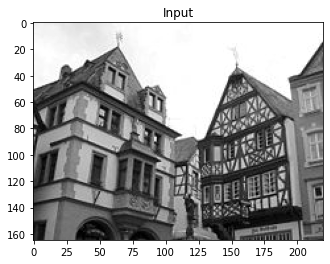

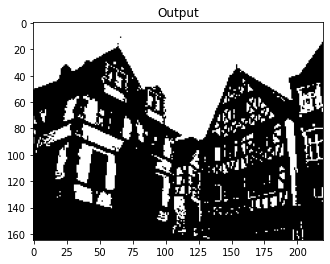

In [3]:
# Load the input image.
img = cv2.imread('img/house.jpg') 

# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Display input image
plt.imshow(gray, 'gray')
plt.title('Input')
plt.show()

# Threshold using OpenCV, otsus thresholding.
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Save the output image
cv2.imwrite("../Result/coin_thresh.jpg", thresh)

plt.imshow(thresh, 'gray')
plt.title('Output')
plt.show()
